In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Clustering
=============

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
X.shape

(100, 2)

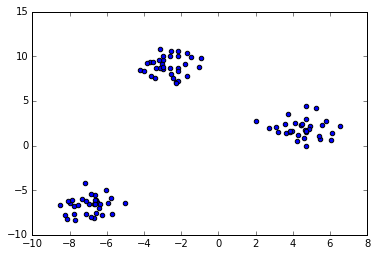

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [5]:
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [6]:
cluster_labels = kmeans.predict(X)

In [7]:
cluster_labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

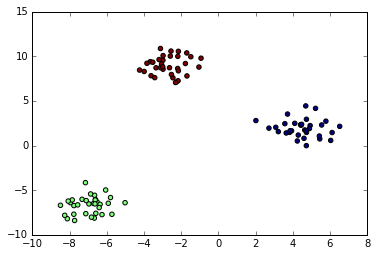

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)

In [9]:
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 2, 0])

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
accuracy_score(y, cluster_labels)

0.0

In [12]:
confusion_matrix(y, cluster_labels)

array([[ 0,  0, 34],
       [33,  0,  0],
       [ 0, 33,  0]])

In [13]:
from sklearn.metrics import adjusted_rand_score

In [14]:
adjusted_rand_score(y, cluster_labels)

1.0

KMeans can generalize, SpectralClustering can not
-----------------------------------------------------------
KMeans has a ``predict`` function.

In [15]:
X_more = np.random.uniform(X.min(), X.max(), size=(10, 2))
X_more
more_cluster_labels = kmeans.predict(X_more)

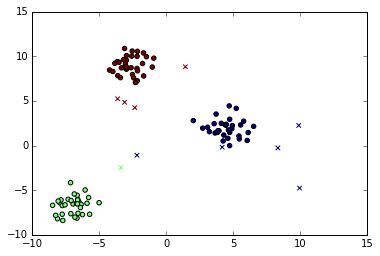

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
plt.scatter(X_more[:, 0], X_more[:, 1], marker="x", c=more_cluster_labels)

In [17]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=3, gamma=.1)

In [18]:
spectral_clustering.fit(X)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=0.1, kernel_params=None,
          n_clusters=3, n_init=10, n_neighbors=10, random_state=None)

In [19]:
cluster_labels = spectral_clustering.predict(X)

AttributeError: 'SpectralClustering' object has no attribute 'predict'

In [20]:
spectral_clustering.labels_

array([0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 0, 1], dtype=int32)

In [21]:
cluster_labels = spectral_clustering.fit_predict(X)

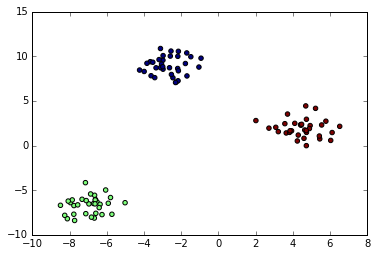

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)

There is no way to apply ``spectral_clustering`` not to ``X_more``.

An overview of clustering algorithms
---------------------------------------

<img src="cluster_comparison.png" width=100%>


More on the website: http://scikit-learn.org/stable/modules/clustering.html

A less trivial example
-------------------------

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()

X, y = digits.data, digits.target

In [24]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [25]:
adjusted_rand_score(y, kmeans.predict(X))

0.6661813350389938

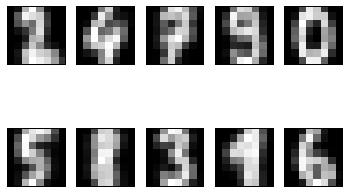

In [26]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())